# **Diabetes**

In this project, build a model to predict the onset of diabetes based on diagnostic measures.

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt

# Additional Imports here
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

from sklearn.utils import resample # for resample data
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE # for resample data
from collections import Counter # for count values in the list



<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
127,1,118,58,36,94,33.3,0.261,23,0
366,6,124,72,0,0,27.6,0.368,29,1
285,7,136,74,26,135,26.0,0.647,51,0


## **Diabetes data**

### 1. Split data

In [ ]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((514, 8), (254, 8), (514,), (254,))

### 2. EDA

**What's the average amount of glucose for who has diabetes?**

The average amount of glucose for who has diabetes between 100 and 200. And the around 100 for normal people.

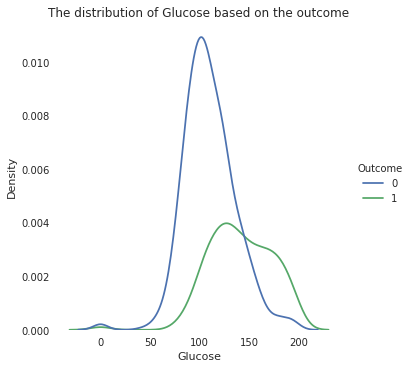

In [ ]:
sns.displot(data = df, x = 'Glucose',hue='Outcome',kind='kde')
plt.title("The distribution of Glucose based on the outcome");

**Are people in their twenties more likely to have diabetes?**

From the below figure, people in their twenties less likely to have diabetes.

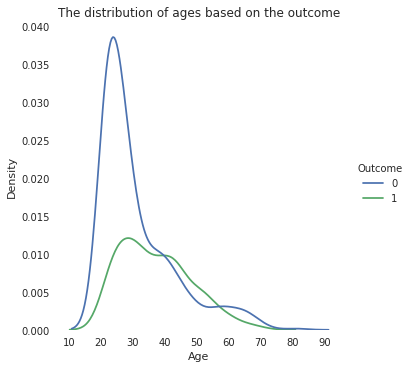

In [ ]:
sns.displot(data= df, x='Age',hue='Outcome',kind='kde')
plt.title("The distribution of ages based on the outcome");

**Is there a relationship between the amount of glucose and BMI?**

The range of BMI for people between 20 and 50. There is bit relation between the amount of glucose and BMI, If the BMI increase then the amount of glucose is increased. Also, the probability of having diabetes is increased.

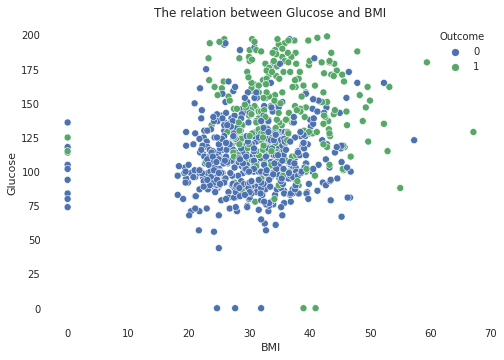

In [ ]:
sns.scatterplot(data = df, x = 'BMI', y = 'Glucose',hue='Outcome')
plt.title("The relation between Glucose and BMI");

### 3. Determine Baseline Model

In [ ]:
# Baseline model
baseline = df.Outcome.value_counts(normalize=True)[0]
df.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

### 4. Scale data

In [ ]:
# create Standard Scaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5. Create Logistic Regression Model

In [ ]:
# create Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train);
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

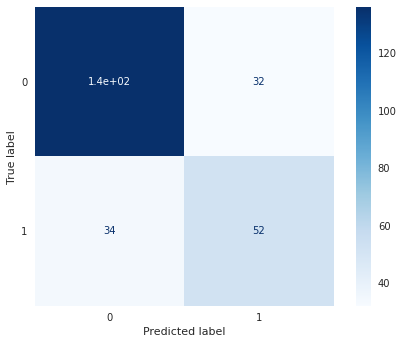

In [ ]:
plot_confusion_matrix(lr,X_test_scaled,y_test,cmap='Blues')

### 6. Compare Results to Baseline

In [ ]:
print("******************************")
print("Result for Logistic Regression")
print("******************************")
print("Baseline: {:.2f}".format(baseline))
print("Accuracy for train: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy for test: {:.2f}".format(lr.score(X_test_scaled, y_test)))


******************************
Result for Logistic Regression
******************************
Baseline: 0.65
Accuracy for train: 0.78
Accuracy for test: 0.74


### 7. Perform PCA

In [ ]:
pca = PCA()
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

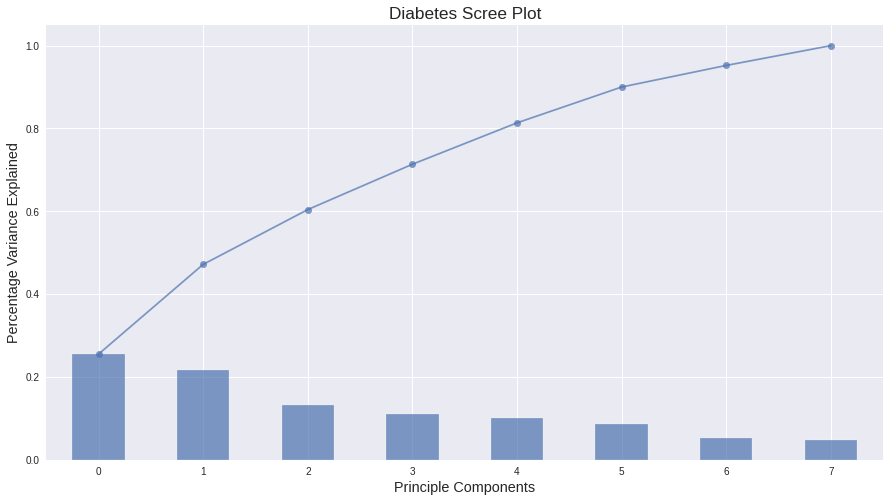

In [ ]:

plt.style.use("seaborn")
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

In [ ]:
# create PCA object
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Number of components : ",pca.n_components_)

Number of components :  4


### 8. Use Your Principal Components for a Logistic Regression Model

In [ ]:
# create Logistic Regression model with PCA
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train);
lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

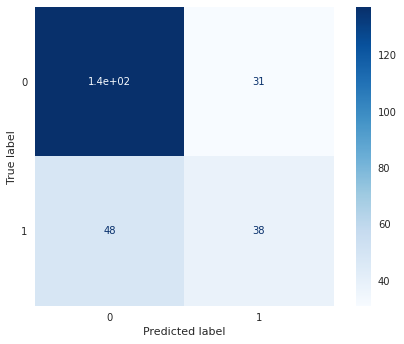

In [ ]:
plot_confusion_matrix(lr_pca,X_test_pca,y_test,cmap='Blues')

### 9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

In [ ]:
print("******************************")
print("Result for Logistic Regression")
print("******************************")
print("Baseline: {:.2f}".format(baseline))
print("Accuracy for train: {:.10f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy for test: {:.10f}".format(lr.score(X_test_scaled, y_test)))
print("\n\n")

print("******************************")
print("Result for Logistic Regression \nwith PCA")
print("******************************")
print("Accuracy for train: {:.10f}".format(lr_pca.score(X_train_pca, y_train)))
print("Accuracy for test: {:.10f}".format(lr_pca.score(X_test_pca, y_test)))

******************************
Result for Logistic Regression
******************************
Baseline: 0.65
Accuracy for train: 0.7801556420
Accuracy for test: 0.7401574803



******************************
Result for Logistic Regression 
with PCA
******************************
Accuracy for train: 0.7354085603
Accuracy for test: 0.6889763780


### 10. Improve model (Pipeline - GridSearchCV)


In [ ]:
# create a pipeline 
pipe = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression()
)

In [ ]:
# add hyper prameters 
param_grid = {
    "standardscaler__with_mean": [True, False], 
    "standardscaler__with_std": [True, False],
    "pca__n_components": range(df.shape[1]), # number of features in the dataset
    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6],
    "logisticregression__max_iter": [100, 500, 1000]
}

# create GridSearchCV model
grid = GridSearchCV(
    pipe, # pipeline
    param_grid=param_grid, # dict of hyper pramters
    cv=5, # number of cross validation
    verbose=2, # Higher number means the training step show more output
    n_jobs=-1 # Use all available cores on my computer (Thanks Ahmed, Zarah, Raghad)
)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   27.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual

In [ ]:
grid.best_params_

{'logisticregression__C': 1,
 'logisticregression__max_iter': 100,
 'pca__n_components': 6,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': False}

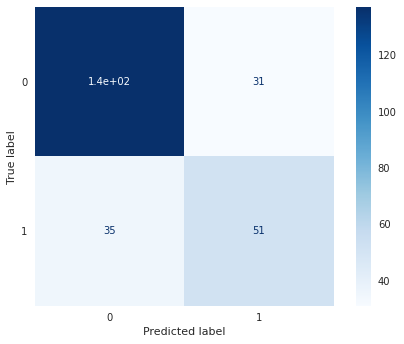

In [ ]:
plot_confusion_matrix(grid.best_estimator_,X_test,y_test,cmap='Blues')

In [ ]:
print("******************************")
print("Result for Logistic Regression")
print("******************************")
print("Baseline: {:.2f}".format(baseline))
print("Accuracy for train: {:.10f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy for test: {:.10f}".format(lr.score(X_test_scaled, y_test)))
print("\n\n")

print("******************************")
print("Result for Logistic Regression \nwith PCA")
print("******************************")
print("Accuracy for train: {:.10f}".format(lr_pca.score(X_train_pca, y_train)))
print("Accuracy for test: {:.10f}".format(lr_pca.score(X_test_pca, y_test)))
print("\n\n")

print("******************************")
print("Result for Logistic Regression \nwith PCA, using GridSearchCV")
print("******************************")
print("Accuracy for train: {:.10f}".format(grid.best_estimator_.score(X_train, y_train)))
print("Accuracy for test: {:.10f}".format(grid.best_estimator_.score(X_test, y_test)))

******************************
Result for Logistic Regression
******************************
Baseline: 0.65
Accuracy for train: 0.7801556420
Accuracy for test: 0.7401574803



******************************
Result for Logistic Regression 
with PCA
******************************
Accuracy for train: 0.7354085603
Accuracy for test: 0.6889763780



******************************
Result for Logistic Regression 
with PCA, using GridSearchCV
******************************
Accuracy for train: 0.7859922179
Accuracy for test: 0.7401574803


## **Resample Data**

### 1. Resample dataset

In [ ]:
# Separate majority and minority classes
df_majority = df[df.Outcome == 0]
df_minority = df[df.Outcome == 1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=500)
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=500)

# Combine minority class with downsampled majority class
df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

### 2. Split data

In [ ]:
X_sample = df_up_down_sampled.drop('Outcome',axis=1)
y_sample = df_up_down_sampled['Outcome']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sample, y_sample, test_size=0.33, random_state=42)

### 3. Baseline model


In [ ]:
# baseline model
df_up_down_sampled.Outcome.value_counts(normalize=True)

1    0.5
0    0.5
Name: Outcome, dtype: float64

### 4. Create pipeline

In [ ]:
# create a pipeline 
pipe_s = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression()
)

In [ ]:
# add hyper prameters 
param_grid_s = {
    "standardscaler__with_mean": [True, False], 
    "standardscaler__with_std": [True, False],
    "pca__n_components": range(df.shape[1]), # number of features in the dataset
    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6],
    "logisticregression__max_iter": [100, 500, 1000]
}

# create GridSearchCV model
grid_s = GridSearchCV(
    pipe_s, # pipeline
    param_grid=param_grid_s, # dict of hyper pramters
    cv=5, # number of cross validation
    verbose=2, # Higher number means the training step show more output
    n_jobs=-1 # Use all available cores on my computer (Thanks Ahmed, Zarah, Raghad)
)

grid_s.fit(X_train_s,y_train_s)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 2152 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   28.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual

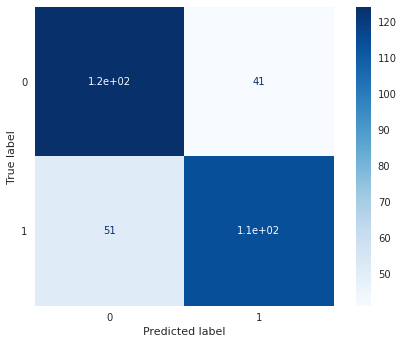

In [ ]:
plot_confusion_matrix(grid_s.best_estimator_,X_test_s,y_test_s,cmap='Blues')

In [ ]:
print("******************************")
print("Result for Logistic Regression \nwith PCA, using GridSearchCV \nAfter Sample data")
print("******************************")
print("Accuracy for train: {:.10f}".format(grid_s.best_estimator_.score(X_train_s, y_train_s)))
print("Accuracy for test: {:.10f}".format(grid_s.best_estimator_.score(X_test_s, y_test_s)))

******************************
Result for Logistic Regression 
with PCA, using GridSearchCV 
After Sample data
******************************
Accuracy for train: 0.7835820896
Accuracy for test: 0.7212121212


## **SMOTE**

### 1. Resample data

In [ ]:
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# the counts of each target in the target list
counter = Counter(y_smote)
print(counter)

Counter({1: 500, 0: 500})


### 3. Split data

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.33, random_state=42)

### 4. Create model 

In [ ]:
# create GridSearchCV model
grid_smote = GridSearchCV(
    pipe_s, # pipeline
    param_grid=param_grid_s, # dict of hyper pramters
    cv=5, # number of cross validation
    verbose=2, # Higher number means the training step show more output
    n_jobs=-1 # Use all available cores on my computer (Thanks Ahmed, Zarah, Raghad)
)

grid_smote.fit(X_train_smote,y_train_smote)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 2332 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   22.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual

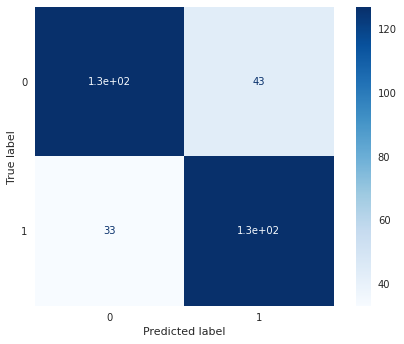

In [ ]:
plot_confusion_matrix(grid_smote.best_estimator_,X_test_smote,y_test_smote,cmap='Blues')

In [ ]:
print("******************************")
print("Result for Logistic Regression \nwith PCA, using GridSearchCV \nUsing SMOTE")
print("******************************")
print("Accuracy for train: {:.10f}".format(grid_smote.best_estimator_.score(X_train_smote, y_train_smote)))
print("Accuracy for test: {:.10f}".format(grid_smote.best_estimator_.score(X_test_smote, y_test_smote)))

******************************
Result for Logistic Regression 
with PCA, using GridSearchCV 
Using SMOTE
******************************
Accuracy for train: 0.7656716418
Accuracy for test: 0.7696969697


## **Conclusion**
From above results, we can summarize these insights:
1. The model that used PCA and GridSearchCV achieve the highest result on train with accuracy 78.6%.
2. The best number of components for PCA is 6.
3. In test, Logistic Regression without PCA and Logistic Regression with PCA and GridSearchCV get the same results. 
4. Using resample techniques reduced the difference between train and test results.